### Paso 4. Análisis exploratorio de datos (Python)

**Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:**

**/datasets/project_sql_result_01.csv. contiene los siguientes datos:**

**company_name: nombre de la empresa de taxis**

**trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.**

**/datasets/project_sql_result_04.csv. contiene los siguientes datos:**

**dropoff_location_name: barrios de Chicago donde finalizaron los viajes**

**average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.**

**Para estos dos datasets ahora necesitas** 

- Importar los archivos
- Estudiar los datos que contienen
- Asegurarte de que los tipos de datos sean correctos
- Identificar los 10 principales barrios en términos de finalización del recorrido
- Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- Sacar conclusiones basadas en cada gráfico y explicar los resultados

### Paso 5. Prueba de hipótesis (Python)

**/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:**

- start_ts: fecha y hora de la recogida
- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos

**Prueba la hipótesis:**

- "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

**Explica:**
- Cómo planteaste las hipótesis nula y alternativa
- Qué criterio usaste para probar las hipótesis y por qué

# Paso 4. Análisis exploratorio de datos (Python)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline
from math import factorial
from scipy import stats as st
import random

In [2]:
try:
    company = pd.read_csv(r"C:\Users\seba\Desktop\project_sql_result_01.csv")
    viajes = pd.read_csv(r"C:\Users\seba\Desktop\project_sql_result_04.csv")
    airport = pd.read_csv(r"C:\Users\seba\Desktop\project_sql_result_07.csv")
except:
    company = pd.read_csv("/datasets/project_sql_result_01.csv")
    viajes = pd.read_csv("/datasets/project_sql_result_04.csv")
    airport = pd.read_csv("/datasets/project_sql_result_07.csv")

In [3]:
company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
company.duplicated().sum()

0

**Conclusión**

Trás leer el Dataframe company, se concluye que no existen datos ausentes, como tampoco existen datos duplicados. Por lo que se puede observar, los tipos de datos son los correctos.

In [7]:
viajes.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
viajes.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [10]:
viajes.duplicated().sum()

0

In [11]:
#Cambiaremos el tipo de dato en la columna "average_trips" del dataframe viajes de float64 a int64
viajes = viajes.copy()

In [12]:
viajes['average_trips'] = viajes['average_trips'].astype('int64')

In [13]:
viajes.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


**Conclusión**

Al leer el Dataframe viajes, visualizamos que no existen datos nulos o datos duplicados. Cambiamos el tipo de dato en la columna "average_trips", ya que es mas fácil trabajar con números enteros en éste caso.
Se visualiza que la media es muy superior a la mediana, por lo que se trabajará con la media, ya que es mas exacto según los datos de la columna.

In [14]:
airport.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [15]:
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [16]:
airport.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [17]:
airport.duplicated().sum()

197

In [18]:
airport['start_ts'] = pd.to_datetime(airport['start_ts'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [19]:
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [20]:
duplicated_airport = airport[airport.duplicated()]
duplicated_airport.head()

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0


**Conclusión**

Al visualizar el tercer dataframe, airport, concluímos que no existen datos nulos, pero sí existen 197 datos duplicados. Al investigar el dataframe, notamos que no existe un identificador de usuario, un id, por lo tanto perfectamente pueden ser otros viajes con los mismos datos.
Corregimos la columna start_ts de object a datatime.

### identificar los 10 principales barrios en términos de finalización del recorrido

In [21]:
location_pop = viajes.pivot_table(index='dropoff_location_name', values='average_trips', aggfunc='sum').sort_values(by='average_trips', ascending=False).reset_index().head(10)

In [22]:
location_pop

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


### Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

In [23]:
max_taxi = company.sort_values(by='trips_amount',ascending=False).head(10)
max_taxi

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [24]:
min_taxi = company.sort_values(by='trips_amount',ascending=False).tail(10)
min_taxi

,company_name,trips_amount
54,2192 - 73487 Zeymane Corp,14
55,6057 - 24657 Richard Addo,13
56,5997 - 65283 AW Services Inc.,12
57,Metro Group,11
58,5062 - 34841 Sam Mestas,8
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3
63,3556 - 36214 RC Andrews Cab,2


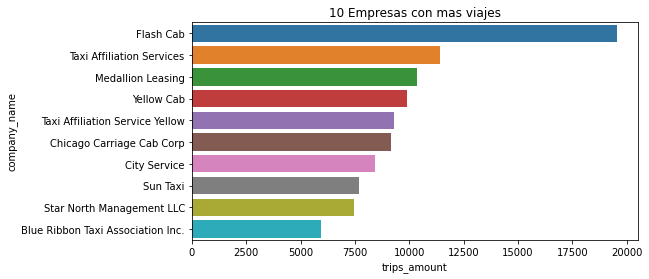

In [25]:
#Gráfico para las empresas con mas viajes
plt.figure(figsize=(8,4))
plt.title('10 Empresas con mas viajes')
sns.barplot(
    data=max_taxi,
    x='trips_amount',
    y='company_name'
);

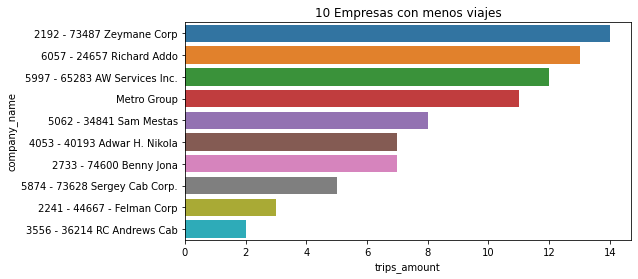

In [26]:
#Gráfico para las empresas con menos viajes
plt.figure(figsize=(8,4))
plt.title('10 Empresas con menos viajes')
sns.barplot(
    data=min_taxi,
    x='trips_amount',
    y='company_name'
);

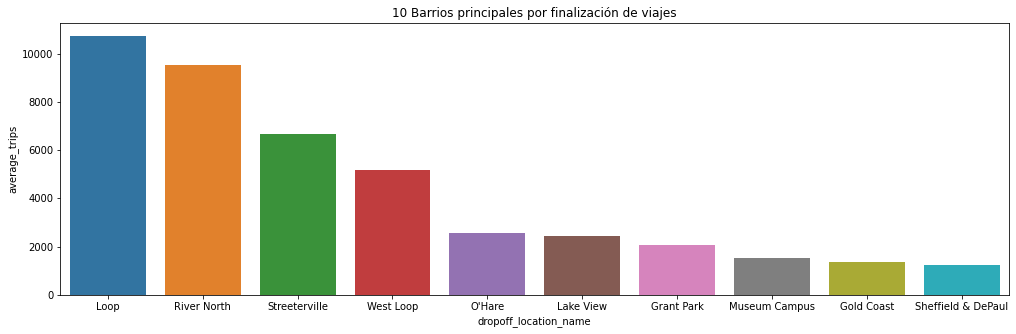

In [27]:
#Gráfico para los 10 barrios principales por finalización de viajes
plt.figure(figsize=(17,5))
plt.title('10 Barrios principales por finalización de viajes')
sns.barplot(
    data=location_pop,
    x='dropoff_location_name',
    y='average_trips'
);

**Conclusión**

Tras la vizualisación de los graficos podemos concluir que la empresa preferida de los usuarios es Flash cab, quién duplica la cantidad de viajes en comparación a sus competidores mas cercanos. Por otra parte, vemos que de la empresa con menos viajes es la empresa Andrews Cab con solo 2 viajes. 

Los principales barrios donde terminan los viajes son Loop, River North, Streeterville y West Loop, muy por sobre el resto.

#  Prueba de hipótesis

In [28]:
airport.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


**"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".**

- Hipotesis Nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos

- Hipotesis alternativa: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

In [29]:
from scipy.stats import levene

In [30]:
#duración promedio de viajes en segundos con buenas condiciones de clima
good_weather = airport.query('weather_conditions == "Good"')
good_weather.duration_seconds.mean()

1999.6756756756756

<div class="alert alert-block alert-info">
<b>Corregido.</b> <a class="tocSkip"></a>

In [31]:
bad_weather = airport.query('weather_conditions == "Bad"')
bad_weather.head()

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0


In [32]:
bad_weather.duration_seconds.mean()

2427.2055555555557

In [33]:
var_good = np.var(good_weather.duration_seconds)
var_bad   = np.var(bad_weather.duration_seconds)
print(var_good)
print("-----")
print(var_bad)

575732.9308497686
-----
517403.56330246915


In [34]:
ejemplo_1 = good_weather['duration_seconds']
ejemplo_2 = bad_weather['duration_seconds']

alpha = 0.05 

results =st.ttest_ind(ejemplo_1, ejemplo_2, equal_var = False) 
print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 6.738994326108734e-12
Rechazamos la hipótesis nula


**Conclusión**

Se nos pide corroborar o descartar la hipótesis: 'La duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos'. Tras realizar una prueba de hipótesis de igualdad sobre las medias rechazamos la hipotesis nula dado que el valor de p-value fue por debajo de lo esperado.

Por lo tanto se concluye que La duración de los viajes desde Loop hasta el Aeropuerto Internacional O'hare SI cambia los sábados lluviosos.

### Conclusión Final

Tras analizar los distintos dataframes, se observa que los datos venían practicamente limpios, salvo pequeños cambios que tuvimos que realizar. Pasando a la visualización de los datos pudimos identificar preferencias de usuarios donde Flash cab es la empresa con mayor cantidad de viajes y Andrews cab la empresa con menos viajes, barrios donde se concentran la mayor cantidad de viajes finalizados, siendo loop el barrio con mayor finalización de viajes. Por ultimo realizamos una prueba de hipotesis para corroborar o descartar el objetivo del proyecto el cual indicaba si el clima afecta el tiempo promedio de los viajes. Dando como resultado que según nuestra prueba el clima si afecta en alguna medida los tiempos medios de viaje.